In [0]:
#Importing required plotting libraries


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive
import numpy as np

# loading the data
drive.mount('data')
data=pd.read_csv('data/My Drive/pubg/train.csv')    

Drive already mounted at data; to attempt to forcibly remount, call drive.mount("data", force_remount=True).


'\nfrom sklearn.linear_model import LinearRegression\nlinReg = LinearRegression()\nlinReg.fit(X_train,Y_train)\n\nY_pred  =linReg.predict(X_test)\n\n'

In [0]:
#separate target and features vairiable 
X = data.iloc[:,3:-1].values
Y = data.iloc[:,-1].values


In [0]:
#splitting the data into training and testing

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25)


In [0]:
#importing deep learning libraries required for ANN

from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [0]:
# gives the correlation of data

data.corr()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,1.000000,0.001050,0.006400,-0.032262,-0.015682,-0.034080,-0.031732,-0.018974,-0.017770,0.046803,-0.003405,-0.031724,-0.022485,-0.016866,0.041232,0.041857,-0.013686,-0.014290,-0.001939,-0.000135,0.001336,-0.001944,-0.014920,-0.033340,-0.011046,-0.018157
groupId,0.001050,1.000000,0.090547,0.000966,-0.000318,0.000549,0.001050,0.000195,-0.000606,0.000408,-0.001800,0.000635,0.000551,-0.000330,-0.001978,-0.002078,0.000147,-0.002865,-0.000300,0.000053,-0.000727,-0.000568,0.000046,0.001101,-0.000419,-0.000239
matchId,0.006400,0.090547,1.000000,0.000825,0.000164,0.000806,0.000346,0.000543,-0.001269,-0.000847,-0.003744,0.000907,-0.000126,0.000054,0.002195,0.002424,-0.000459,0.000064,-0.000660,0.000054,-0.000780,-0.000296,-0.000823,0.001212,-0.000458,0.000423
assists,-0.032262,0.000966,0.000825,1.000000,0.312516,0.421591,0.336822,0.213781,0.254413,-0.299240,0.103351,0.332530,0.247418,0.259494,-0.146551,-0.146017,0.212880,0.095768,0.011365,0.028043,0.004533,0.042473,0.286199,0.254903,0.074668,0.304642
boosts,-0.015682,-0.000318,0.000164,0.312516,1.000000,0.525806,0.354167,0.342132,0.543742,-0.540404,0.150880,0.501028,0.403381,0.423239,-0.017485,-0.017577,0.262386,0.308582,0.036168,0.115051,-0.001643,0.070621,0.643818,0.383074,0.121879,0.618075
damageDealt,-0.034080,0.000549,0.000806,0.421591,0.525806,1.000000,0.776050,0.618815,0.381556,-0.674264,0.241333,0.886165,0.702178,0.543357,-0.046423,-0.046156,0.282945,0.136733,0.054155,0.042669,0.057412,0.066731,0.397477,0.362554,0.110597,0.438552
DBNOs,-0.031732,0.001050,0.000346,0.336822,0.354167,0.776050,1.000000,0.512157,0.289970,-0.561372,0.197638,0.754374,0.656239,0.430523,-0.252001,-0.250742,0.294708,0.078993,0.034283,0.020948,0.077216,0.042757,0.269110,0.266989,0.084146,0.279475
headshotKills,-0.018974,0.000195,0.000543,0.213781,0.342132,0.618815,0.512157,1.000000,0.229129,-0.480663,0.157129,0.683723,0.524479,0.436106,0.004057,0.003726,0.171552,0.069235,0.015664,0.032103,0.012143,0.031140,0.255772,0.229016,0.063710,0.278705
heals,-0.017770,-0.000606,-0.001269,0.254413,0.543742,0.381556,0.289970,0.229129,1.000000,-0.394194,0.082882,0.344077,0.287548,0.279934,-0.067800,-0.068220,0.249880,0.280616,0.026778,0.082417,0.012462,0.054701,0.432847,0.313044,0.079382,0.427986
killPlace,0.046803,0.000408,-0.000847,-0.299240,-0.540404,-0.674264,-0.561372,-0.480663,-0.394194,1.000000,-0.157645,-0.728624,-0.809442,-0.520010,0.041661,0.042314,-0.282154,-0.204666,-0.048464,-0.092159,-0.030694,-0.055524,-0.580114,-0.469039,-0.137097,-0.708314


In [0]:
# Make ANN(Artficial Nueral Network ) by creating input layer, hidden layers(contains nodes) and an output layer for the model

classifier = Sequential()
classifier.add(Dense(11, kernel_initializer='uniform', activation='relu' ,input_dim=22))
classifier.add(Dense(11, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(11, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(1, kernel_initializer='uniform', activation='linear'))
classifier.compile(optimizer='adamax', loss='mean_absolute_error',metrics=['mean_absolute_error'])

W0712 06:30:24.420179 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0712 06:30:24.442639 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0712 06:30:24.445949 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0712 06:30:24.515761 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [0]:
# PREDICTION AND ACCURACY OF THE MODEL


classifier.fit(X_train,Y_train, batch_size=1000, epochs=50)
Y_pred = classifier.predict(X_test) 

from sklearn.metrics import explained_variance_score
accuracies = explained_variance_score(Y_test,Y_pred) 

W0712 06:30:24.677652 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0712 06:30:24.747587 140657800333184 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0928 - mean_absolute_error: 0.0928
Epoch 2/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0809 - mean_absolute_error: 0.0809
Epoch 3/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0784 - mean_absolute_error: 0.0784
Epoch 4/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0757 - mean_absolute_error: 0.0757
Epoch 5/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0733 - mean_absolute_error: 0.0733
Epoch 6/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0723 - mean_absolute_error: 0.0723
Epoch 7/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0716 - mean_absolute_error: 0.0716
Epoch 8/50
3268002/3268002 [==============================] - 8s 2us/step - loss: 0.0711 - mean_absolute_error: 0.0711
Epoch 9/50
3268002/3268002 [====================

In [0]:
accuracies

0.9026929914684868

In [0]:
# Shows the correlation of winPlacePerc

winplace_corr=data.corr()['winPlacePerc']
win_high=winplace_corr[abs(winplace_corr)>0.4]
win_high.drop('winPlacePerc',inplace=True)
win_high=pd.DataFrame(win_high)

Text(0, 0.5, 'Correlation')

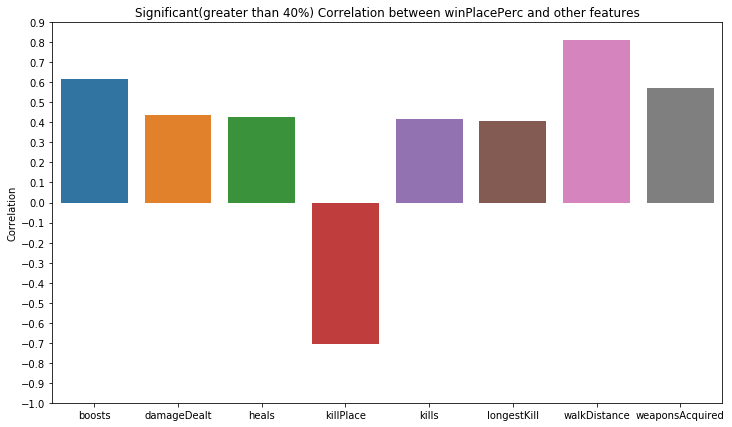

In [0]:
#Plotting the correlation of winPlacePerc vs other features using barplot

plt.figure(figsize=(12,7))
sns.barplot(x=win_high.index,y=win_high['winPlacePerc'])
plt.yticks(np.arange(-1, 1, step=0.1))
plt.title('Significant(greater than 40%) Correlation between winPlacePerc and other features')
plt.ylabel('Correlation')

Text(8.125, 0.5, 'Correlation')

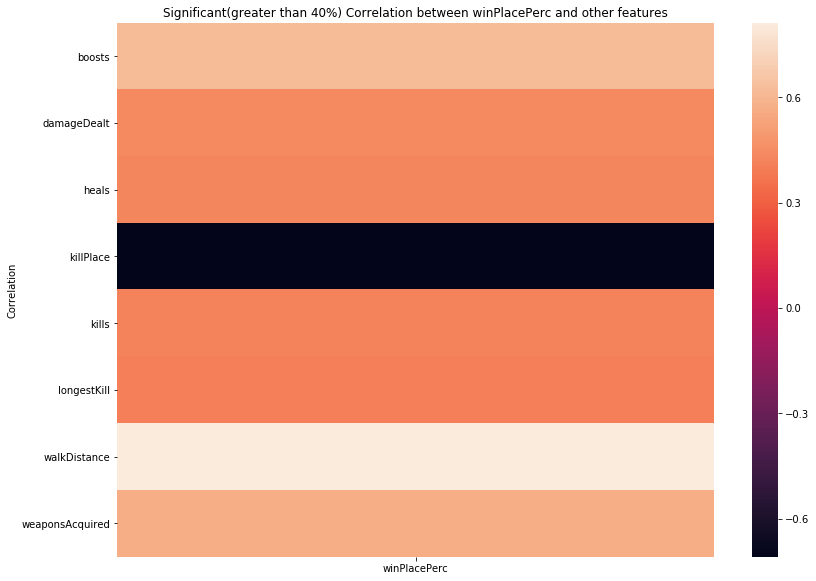

In [0]:

#Plotting the correlation of winPlacePerc vs other features using heatmap

plt.figure(figsize=(12,8))
sns.heatmap(win_high)
plt.tight_layout()
plt.title('Significant(greater than 40%) Correlation between winPlacePerc and other features')
plt.ylabel('Correlation')

In [0]:
# Working with only first 10 matchID(s) 

data_visu = data.loc[data['matchId'] < 10]

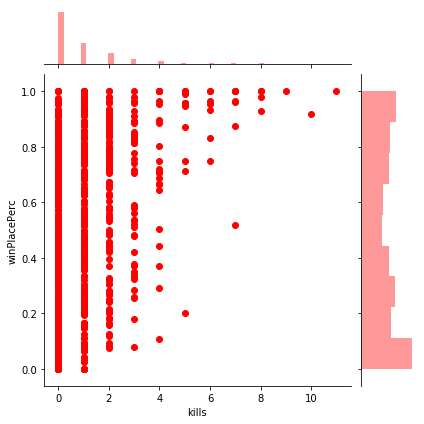

In [0]:
# Kills vs winPlacePerc plot which shows that how kills depends or decide the win percentage

sns.jointplot('kills','winPlacePerc',data_visu,color='red')

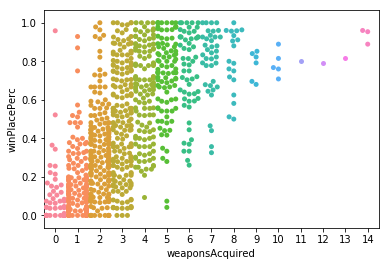

In [0]:
# weaponsAcquired vs winPlaceperc plot which shows how much loot will decide your win percentage 

sns.swarmplot(x='weaponsAcquired',y='winPlacePerc',data=data_visu)

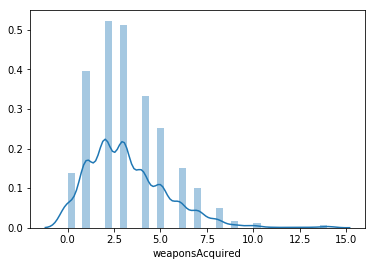

In [0]:
sns.distplot(data_visu['weaponsAcquired'])

<function matplotlib.pyplot.tight_layout>

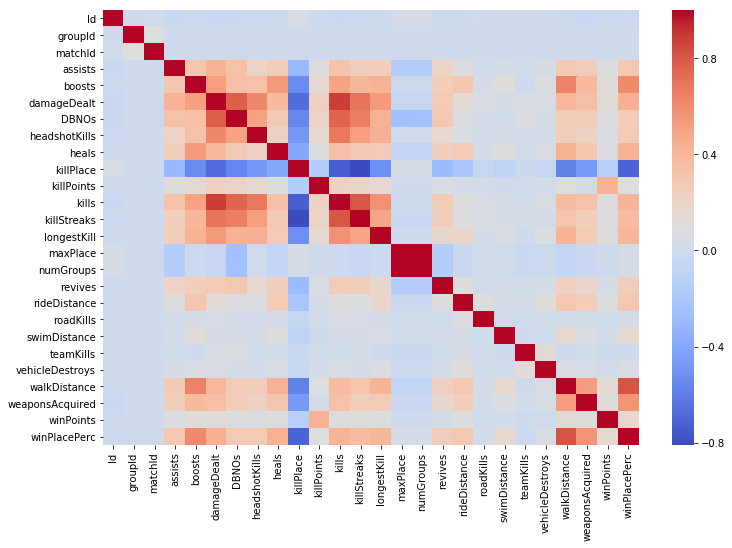

In [0]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm')
plt.tight_layout

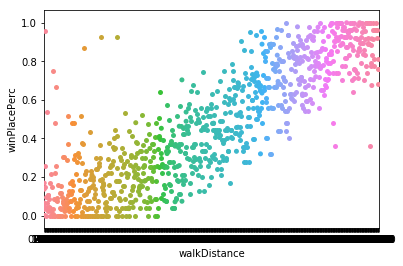

In [0]:
# walkDistance vs winPlacePerc plot which shows how the distance play a major role in winning percentage 

sns.stripplot(x='walkDistance',y='winPlacePerc', data=data_visu)